# Progetto Machine Learning
Progetto per il corso di Machine Learning - SUPSI DTI 2020/2021.

Gruppo formato da:
* De Santi Massimo
* Aleskandar Stojkovski

## Dataset
In Portogallo la percentuale dei studenti che abbandonano la scuola tra i 18 e i 24 anni e' particolarmente alta (40%) rispetto al resto d'europa (15%).
L'obiettivo e' quello di poter prevedere possibili fallimenti in modo da offrire supporto in maniera tempestiva agli stundenti in difficolta'. Inoltre, potrebbe essere interessante capire se esistono fattori esterni che influenzano il rendimento degli studenti.

Il seguente dataset contiente i dati di due scuole superiori Portoghesi: 

| Scuola | Osservazioni |
| :-- | --- | 
| Gabriel Pereira (GP) | 772 |
| Mousinho da Silveira (MS) | 272 |

Attraverso due distinti **dataset** vengono analizzate le performance di due **materie** nell'arco del triennio di studi:

| Dataset | Materia | Osservazioni |
| :-- | :-- | --- | 
| *student-mat.csv* | Matematica | 395 |
| *student-por.csv* | Lingua Portoghese | 649 |

Tra le variabili **indipendenti** (attributi) troviamo:
- attributi demografici
- attributi sociali
- attributi relativi alla scuola

Variabili **dipendenti** (valore target):
- voti dei rispettivi anni (`G1`, `G2`, `G3`) su una scala \[0..20\]


## Descrizione Attributi

| i | col | description |
| --- | :- | :- |
| 1  | school     | student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
| 2  | sex        | student's sex (binary: "F" - female or "M" - male)
| 3  | age        | student's age (numeric: from 15 to 22)
| 4  | address    | student's home address type (binary: "U" - urban or "R" - rural)
| 5  | famsize    | family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
| 6  | Pstatus    | parent's cohabitation status (binary: "T" - living together or "A" - apart)
| 7  | Medu       | mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
| 8  | Fedu       | father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
| 9  | Mjob       | mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
| 10 | Fjob       | father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
| 11 | reason     | reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
| 12 | guardian   | student's guardian (nominal: "mother", "father" or "other")
| 13 | traveltime | home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
| 14 | studytime  | weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
| 15 | failures   | number of past class failures (numeric: n if 1<=n<3, else 4)
| 16 | schoolsup  | extra educational support (binary: yes or no)
| 17 | famsup     | family educational support (binary: yes or no)
| 18 | paid       | extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
| 19 | activities | extra-curricular activities (binary: yes or no)
| 20 | nursery    | attended nursery school (binary: yes or no)
| 21 | higher     | wants to take higher education (binary: yes or no)
| 22 | internet   | Internet access at home (binary: yes or no)
| 23 | romantic   | with a romantic relationship (binary: yes or no)
| 24 | famrel     | quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
| 25 | freetime   | free time after school (numeric: from 1 - very low to 5 - very high)
| 26 | goout      | going out with friends (numeric: from 1 - very low to 5 - very high)
| 27 | Dalc       | workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
| 28 | Walc       | weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
| 29 | health     | current health status (numeric: from 1 - very bad to 5 - very good)
| 30 | absences   | number of school absences (numeric: from 0 to 93)
| 31 | G1 | first period grade (numeric: from 0 to 20) |
| 31 | G2 | second period grade (numeric: from 0 to 20) |
| 32 | G3 | final grade (numeric: from 0 to 20, output target) |


## Note
* L'attributo target `G3` (Voto terzo e ultimo anno) ha una forte correlazione con gli attributi `G1` (voto primo anno) e `G2` (voto secondo anno). E' piu' difficile predire `G3` senza `G1` e `G2`, ma questa predizione e' anche piu' utile.
* Eseguendo un `group by` per attributi demografici e' possibile identificare gli studenti univoci come mostrato nel file student-merge.R

## Riferimenti

* Link dataset: https://archive.ics.uci.edu/ml/datasets/Student+Performance
* P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. http://www3.dsi.uminho.pt/pcortez/student.pdf

# Caricamento Dataset

In [71]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# dataset urls
base_url = "https://raw.githubusercontent.com/aleksandarstojkovski/SUPSI_Machine_Learning/main/dataset"
portuguese_dataset_url = f"{base_url}/student-por.csv"
math_dataset_url = f"{base_url}/student-mat.csv"

# dataframes
df_por = pd.read_csv(portuguese_dataset_url, sep=';')
df_math = pd.read_csv(math_dataset_url, sep=';')
df = pd.concat([df_por, df_math], ignore_index=True)

# Esplorazione dei dati

Usiamo la classe **DataFrame** per ottenere informazioni di sintesi sui dati caricati

In [3]:
# visualizza le prime e ultime righe del DataFrame, il numero di righe e di colonne
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
# e' possibile estrarre il numero di righe e di colonne tramite la proprieta' shape del DataFrame
num_rows, num_cols = df.shape
print(f'Numero righe: {num_rows}')
print(f'Numero colonne: {num_cols}')

Numero righe: 1044
Numero colonne: 33


In [62]:
# stampa un sommario delle features (colonne) del DataFrame: indice, nome, # valori nulli, tipo
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [6]:
# controllo se ci sono righe duplicate (0=falso)
df.duplicated().sum()

0

In [7]:
# controllo numero di valori univoci
# df.nunique()

In [8]:
# stampa un sommario statistico: dispersione e forma della distribuzione del DataFrame 
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


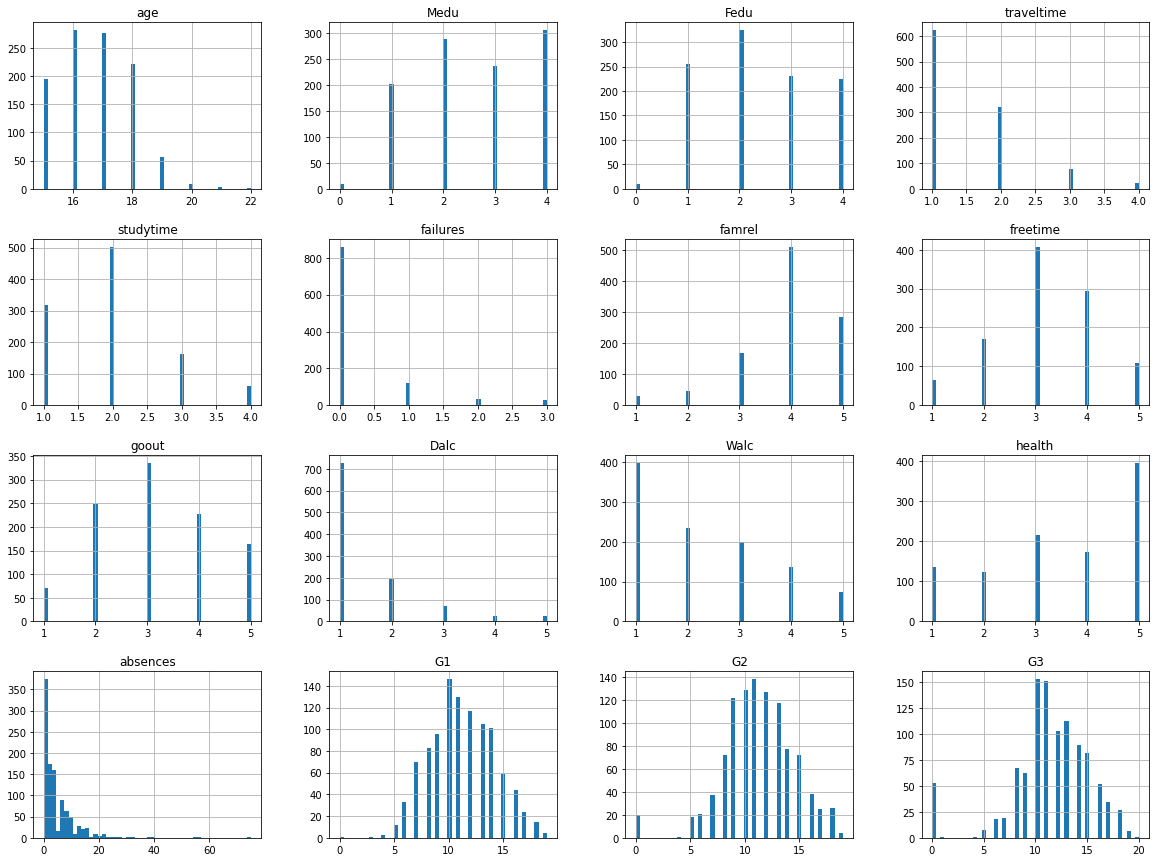

In [9]:
# Visualizzazione grafica della distribuzione dei valori delle features (istogrammi)
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
by_school = df['school'].value_counts().reset_index()
by_school.columns = ['school', 'count']
by_school

,school,count
0,GP,772
1,MS,272


## Identificare gli studenti univoci
Anche se sono coinvolte 2 differenti scuole, le **1044** osservazioni non rappresentano studenti univoci.  
E' ragionavole pensare che alcuni studenti seguano sia il corso di Matematica che quello di Lingua Portoghese.  
Pur non avendo accesso ad un ID univoco per studente, possiamo cercare di raggruppare i dati per caratteristiche demografiche.  
Dai risultati ottenuti notiamo che ci sono **672** studenti univoci, divisi in **300** studenti che seguono una materia sola e altri **372** che seguono sia Matematica che Potroghese. 

In [11]:
len(df_por) #649 rows
len(df_math) #395 rows
len(df) #1044 total rows

#group_cols = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
group_cols = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason", "nursery","internet",
              "guardian", "traveltime","famrel","freetime","goout","Dalc","Walc"]
size = df.groupby(group_cols).size().reset_index() 
len(size[size[0] > 2]) #0 studenti, OK avendo 2 materie non ci aspettiamo piu' di 2 sovrapposizioni
print(f'Numero studenti totali: {len(size[size[0] >= 1])}') #672 
print(f'Numero studenti che seguono sia Matematica che Portoghese: {len(size[size[0] == 2])}') #372 
print(f'Numero studenti che seguono solo una materia: {len(size[size[0] == 1])}') #300


Numero studenti totali: 672
Numero studenti che seguono sia Matematica che Portoghese: 372
Numero studenti che seguono solo una materia: 300


## Analisi caratteristiche demografiche

In [12]:
gender_count = df['sex'].value_counts().reset_index()
gender_count.columns = ['gender', 'count']
gender_count

,gender,count
0,F,591
1,M,453


In [37]:
#fig = px.pie(gender_count, values='count', names='gender', color='gender', color_discrete_map={'F':'pink', 'M':'royalblue'})
fig = px.pie(df, names='sex', color='sex', color_discrete_map={'F':'pink', 'M':'royalblue'})
fig.update_layout(
    title=dict(
        text='Distribuzione Maschi/Femmine',
        y=0.95,
        x=0.5,
        xanchor='center',
        yanchor='top'        
    )
)
fig.show()

# Coefficienti di correlazione

Verifichiamo se esistono eventuali correlazioni tra le diverse feature.
Come ci aspettavamo `G1`,`G2`,`G3` hanno una forte correlazione tra di loro.
Tra le altre feaures,`failures` (bocciature passate) e `Medu` (livello istruzione madre) potrebbero avere una certa correlazione con i voti.


<AxesSubplot:>

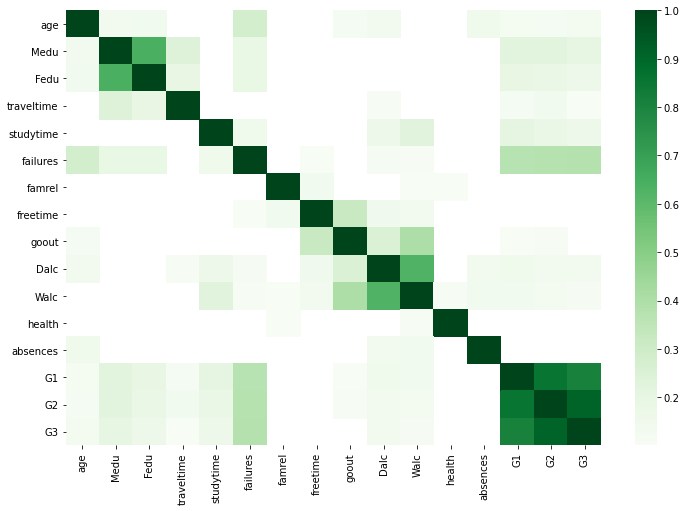

In [61]:
# Calcolo dei coefficienti di correlazione tra le features
corr_matrix = df.corr().abs()
kot = corr_matrix[corr_matrix>=.1]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")


# Preprocessing dei dati

I dati contenuti nel DataFrame appena caricato non possono essere usati direttamente per l'addestramento di un modello di Machine Learning: la presenza di feature eterogenee (stringhe, interi e numeri floating point) deve essere gestita attraverso un'opportuna fase di preprocessing. Per poter addestrare un modello di Machine Learning è necessario convertire i dati del **DataFrame** in valori numerici e memorizzarli in un `ndarray`.

In [106]:
# usiamo Mother e Father education
#columns = ['Medu','Fedu']
columns = ['G1','G2']
indexes = [df.columns.get_loc(col) for col in columns]
data_x = df.values[:,indexes]
data_x = data_x.astype(np.float32)

# data_y conterrà solo G3
data_y = df.values[:,-1]
data_y = data_y.astype(np.float32)

# Split validation set
Dividiamo il dataset in **train** (60%) e **validation** (40%)

In [107]:
valid_portion = 0.4
train_x, validation_x, train_y, validation_y = train_test_split(data_x, data_y, test_size=valid_portion, random_state=1)

# Regressione
La libreria Scikit-learn mette a disposizione diversi algoritmi per la regressione. Durante questa esercitazione verrà fatto uso di LinearRegression e di RandomForestRegressor.
L'obiettivo è quello di minimizzare l'RMSE, ovvero lo scostamento tra il valore predetto e quello reale.
Nella cella seguente è fornito il codice per creare e addestrare un'istanza di LinearRegression.

In [108]:
# Addestramento di un LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

# Ottenimento delle predizioni
train_y_predicted = lin_reg.predict(train_x)

# Calcolo del RMSE
rmse = np.sqrt(mean_squared_error(train_y, train_y_predicted))
print('Train RMSE: ', rmse) 

# Ottenimento delle predizioni (validation) e calcolo RMSE
validation_y_predicted = lin_reg.predict(validation_x)
rmse = np.sqrt(mean_squared_error(validation_y, validation_y_predicted))
print('Validation RMSE: ', rmse)

print('R2 score:', lin_reg.score(validation_x, validation_y))

Train RMSE:  1.5428427
Validation RMSE:  1.6404667
R2 score: 0.8156157288392467


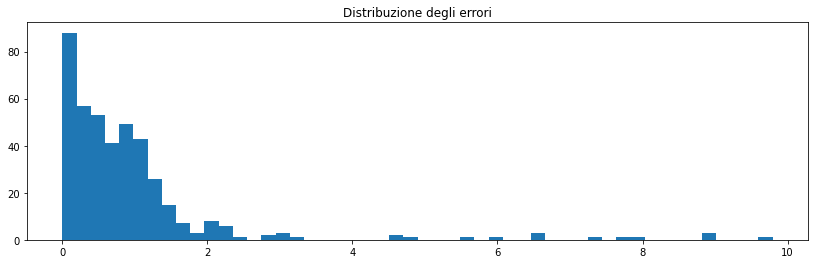

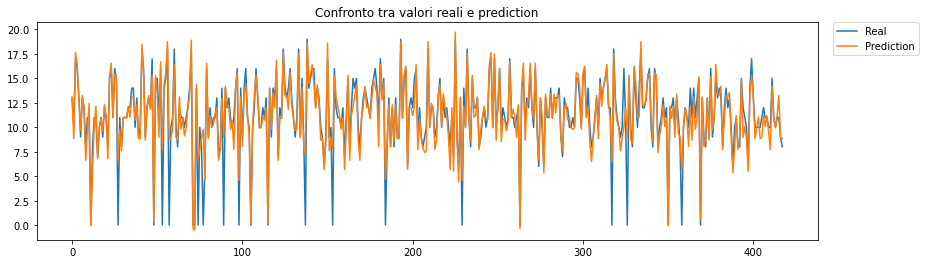

In [109]:
# Calcola l'errore come scostamento delle predizioni dal valore reale
errors = np.abs(validation_y - validation_y_predicted) 

plt.figure(figsize=(14, 4))
plt.title("Distribuzione degli errori")
plt.hist(x = errors, bins=50)
plt.show()

# Visualizza l'andamento reale e quello predetto
plt.figure(figsize=(14, 4))
plt.title("Confronto tra valori reali e prediction")
plt.plot(validation_y[0:1000], label='Real')
plt.plot(validation_y_predicted[0:1000], label='Prediction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.show()